In [48]:
from flask import Flask, request, jsonify
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from joblib import load
import pickle
import pandas as pd

In [49]:
tfidf_vectorizer = load('tfidf_vectorizer.joblib')
tfidf_matrix = load('tfidf_matrix.joblib')

In [85]:
def recommend(ingredients):
    
    df1=pd.read_csv("cleaned_file-1.csv")
    df2=pd.read_csv("cleaned_file-2.csv")
    df3=pd.read_csv("cleaned_file-3.csv")
    df=pd.concat([df1,df2,df3])
    user_idf = tfidf_vectorizer.transform([ingredients])
    sim_ing = cosine_similarity(user_idf, tfidf_matrix)
    li=sorted(list(enumerate(sim_ing[0])),reverse=True,key=lambda x:x[1])
    return li
    indices = [index for index, _ in li]

In [86]:
ingr_list=['chicken','eggs','rice','milk','wheat','fish','tomato','potato']

In [87]:
import random
import matplotlib.pyplot as plt

In [100]:
def tester():
    num_elements = random.randint(1, 5)

    # Pick random elements using random.sample
    random_elements = random.sample(ingr_list, num_elements)
    ingr_strng=str(random_elements)
    results=recommend(ingr_strng)
    index=[item[0] for item in results]
    sim=[item[1] for item in results]
    plt.scatter(index,sim)
    plt.xlabel("Indexes")
    plt.ylabel("Similarity")
    plt.title(f'Scatter Plot with {num_elements} Elements')
    plt.show()
    return num_elements,results[0][1]

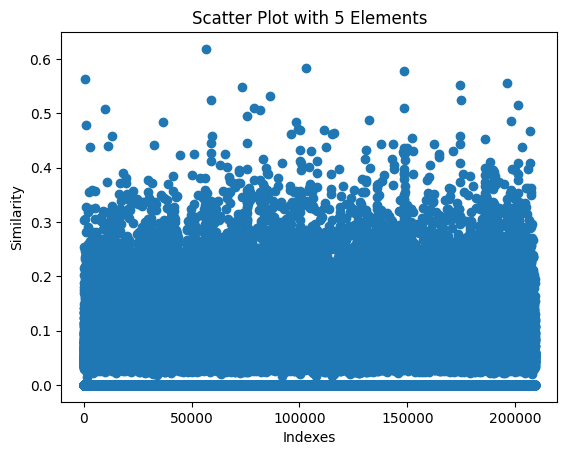

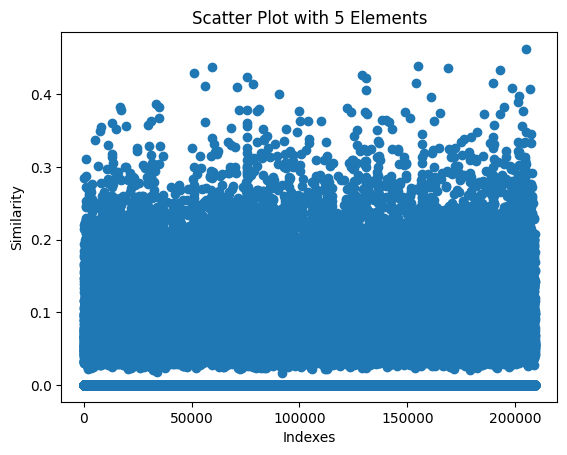

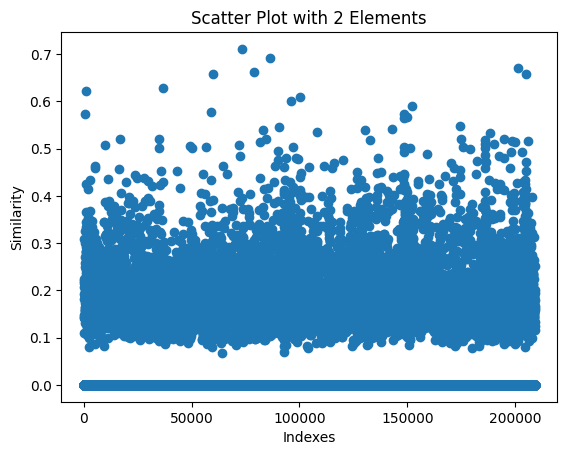

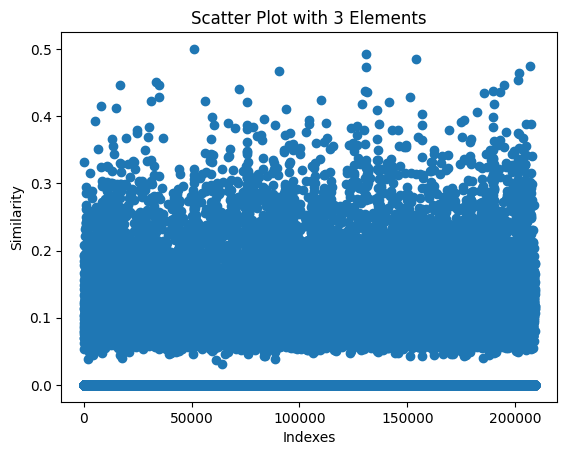

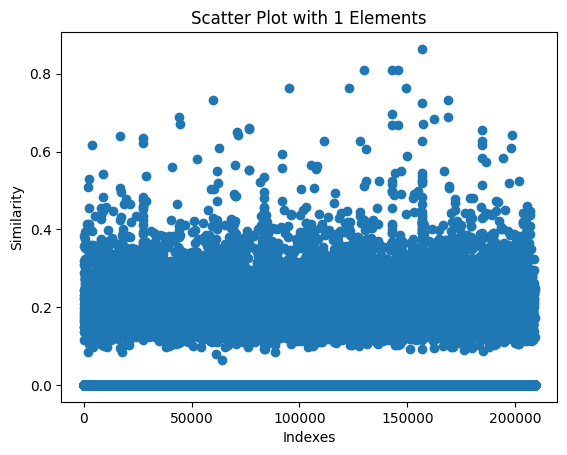

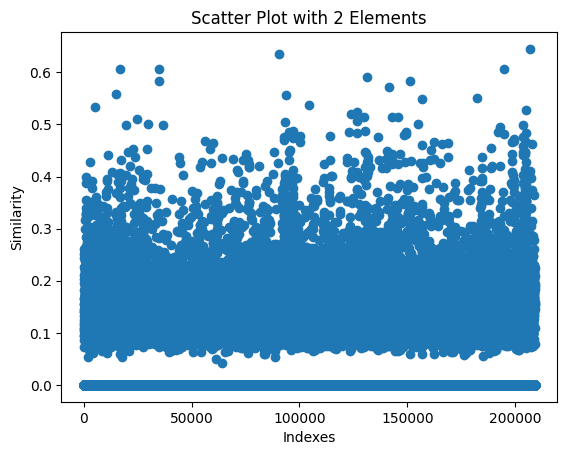

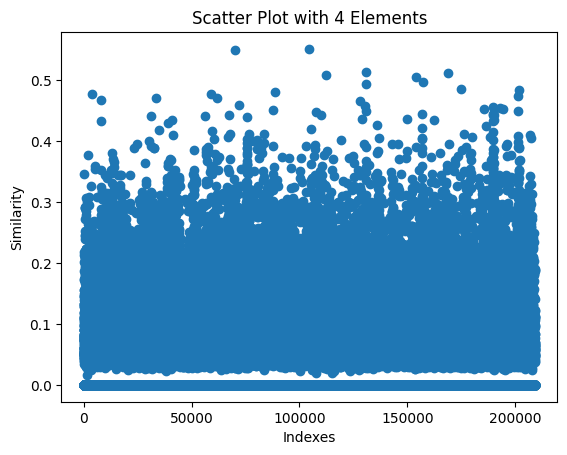

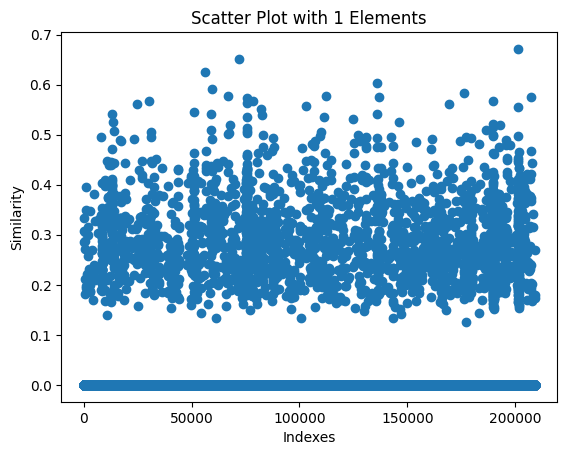

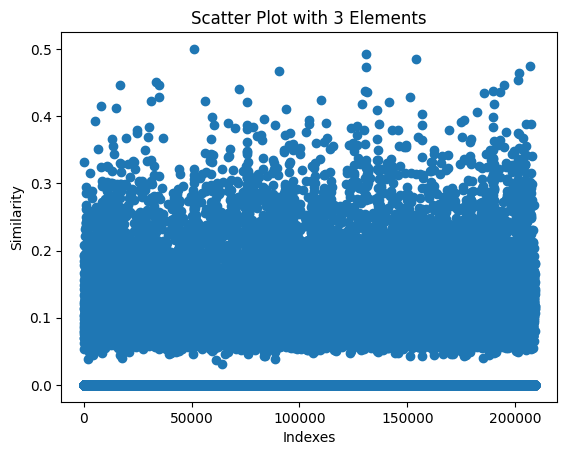

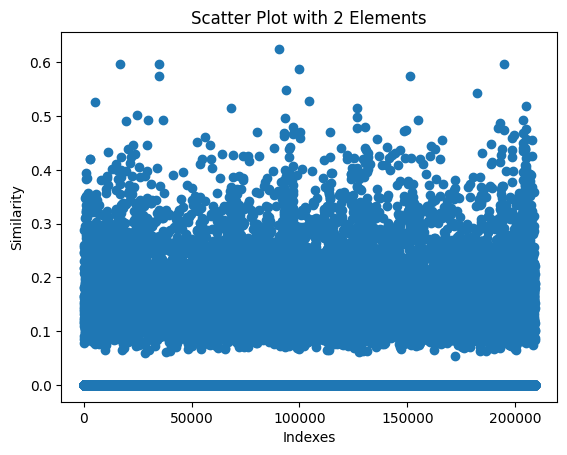

[(5, 0.618601071234947),
 (5, 0.46235398052672744),
 (2, 0.7111728434004001),
 (3, 0.5002560085666441),
 (1, 0.8638642632799775),
 (2, 0.6449068662904502),
 (4, 0.5515650624734368),
 (1, 0.6713158898557736),
 (3, 0.5002560085666441),
 (2, 0.6248667718067389)]

In [111]:
accuracy=[]
for i in range(10):
    accuracy.append(tester())

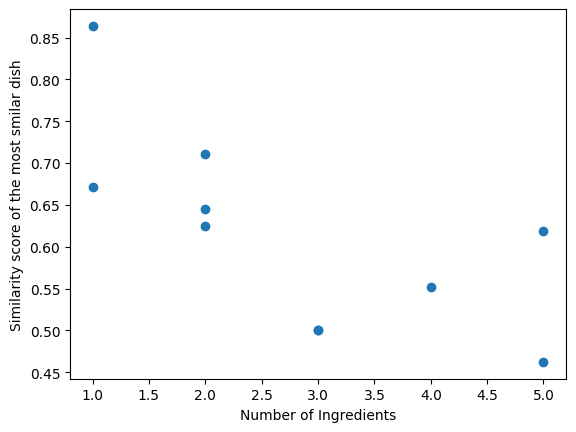

In [116]:
num_ele=[item[0] for item in accuracy]
simi=[item[1] for item in accuracy]
sorted_ele=sorted(num_ele)
sorted_ele=sorted(simi)
plt.scatter(num_ele,simi)
plt.xlabel("Number of Ingredients")
plt.ylabel("Similarity score of the most smilar dish")
plt.show()